In [2]:

#importing the libraries
import pandas as pd
import numpy as np

#reading the dataset
data=pd.read_csv('C:\\Users\\Owner\\Downloads\\titanic_train.csv')
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
print (data.info)

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [61]:
data['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [62]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
data['Sex']= label_encoder.fit_transform(data['Sex']) 
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


In [80]:

# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(data.Sex.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["Male", "Female"]) 
# dfOneHot = pd.DataFrame(X)
df = pd.concat([data, dfOneHot], axis=1)
#droping the country column 
df= df.drop(['Sex'], axis=1) 
#printing to verify 
df.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Female
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0.0,1.0


In [90]:
import statsmodels.api as sm
import numpy as np
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
#     x_var_names = data.columns
    for i in range(0, vif_df.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

X=df.drop(['Female'], axis=1)
calculate_vif(X)

,Var,Vif


In [92]:
df = data.drop(data.columns[[1]], axis=1)
calculate_vif(df)

,Var,Vif


In [97]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_sex=OneHotEncoder(sparse=False)
onehot_encoder_sex.fit_transform(data[['Sex']])

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [106]:
pd.get_dummies(data[['Sex', 'Embarked']])

,Sex,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,1,0,0,1
...,...,...,...,...
886,1,0,0,1
887,0,0,0,1
888,0,0,0,1
889,1,1,0,0


In [114]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [119]:
>>> import numpy as np
>>> from sklearn.impute import SimpleImputer
>>> imp_mean = SimpleImputer(missing_values=np.nan, strategy='mode')
>>> imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
SimpleImputer()
>>> X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
>>> print(imp_mean.transform(X))
[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]

SyntaxError: invalid syntax (<ipython-input-119-dfd4ec676220>, line 8)

In [135]:
# One Hot Encoding
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
data['Embarked_mode_imputed']=imputer.fit_transform(data['Embarked'])
sns.heatmap.isnull()
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder(sparse=False)
sex_embarked_oh=onehot_encoder.fit_transform(data[['Sex', 'Embarked']])
pd.DataFrame(sex_embarked_oh, columns=['male', 'Q', 'S'])

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'S'

In [153]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [156]:
import pandas as pd
from category_encoders import TargetEncoder

In [158]:
encoder = TargetEncoder()
data['Sex Encoded'] = encoder.fit_transform(data['Sex'], data['Survived'])

In [159]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

In [160]:
le = LabelEncoder()
data['Sex Encoded'] = le.fit_transform(data.Sex)

In [167]:
encoder = OneHotEncoder(categories = 'auto')
X = encoder.fit_transform(
    data['Sex Encoded'].values.reshape(-1,1)).toarray()

dfonehot = pd.DataFrame(X, columns=['female', 'male'])
dfonehot
df = pd.concat([data, dfonehot], axis =1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex Encoded,female,male
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,1,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1,0.0,1.0


In [1]:
import pandas as pd
from sklearn import preprocessing

# Set charts to view inline
%matplotlib inline

In [4]:
# Create an example dataframe with a column of unnormalized data
data = {'score': [234,24,14,27,-74,46,73,-18,59,160]}
df = pd.DataFrame(data)
df

,score
0,234
1,24
2,14
3,27
4,-74
5,46
6,73
7,-18
8,59
9,160


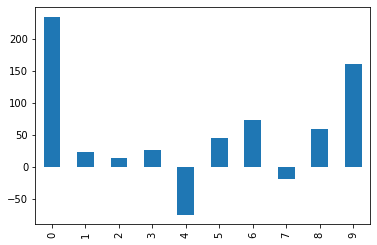

In [5]:
# View the unnormalized data
df['score'].plot(kind='bar')

In [6]:
# Create x, where x the 'scores' column's values as floats
x = df[['score']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

In [7]:
# View the dataframe
df_normalized

,0
0,1.000000
1,0.318182
2,0.285714
3,0.327922
4,0.000000
5,0.389610
6,0.477273
7,0.181818
8,0.431818
9,0.759740


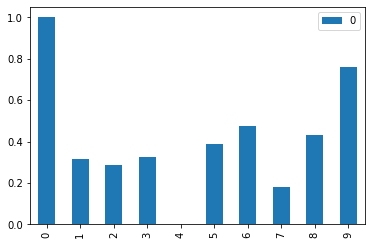

In [8]:
# Plot the dataframe
df_normalized.plot(kind='bar')